In [1]:
import pandas as pd
import numpy as np
import scipy 
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import statsmodels
from statsmodels.stats.weightstats import *

In [4]:
data = pd.read_csv('../data/credit_card_default_analysis.csv')

In [5]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### 1

##### Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы:

***a)*** о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки

In [6]:
back = data[data['default']==0]['LIMIT_BAL']
not_back = data[data['default']==1]['LIMIT_BAL']

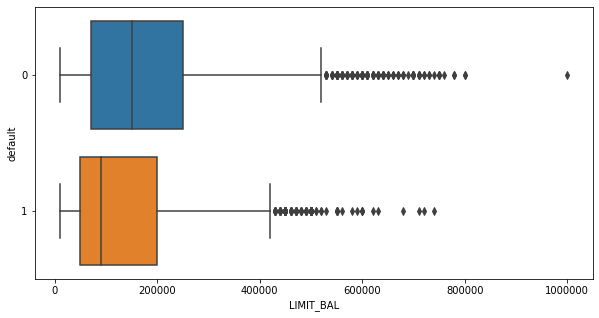

In [7]:
plt.figure(figsize=(10, 5))
sns.boxplot(data['LIMIT_BAL'], data['default'], orient='h');

Зрительно видно, что медианы отличаются. Проверим гипотезы с помощью статистики:
   * Н0: медианы равны
   * Н1: медианы не равны

Проверять данную гипотезу будем с помощью **бутстрепа**, тк распределение стастики 50% - квантиля нам неизвестно

In [8]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [9]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [10]:
np.random.seed(0)

back_median_scores = list(map(np.median, get_bootstrap_samples(back.values, 1000)))
not_back_median_scores = list(map(np.median, get_bootstrap_samples(not_back.values, 1000)))

print("95% confidence interval for returned:",  stat_intervals(back_median_scores, 0.05))
print("95% confidence interval for didn't return:",  stat_intervals(not_back_median_scores, 0.05))

95% confidence interval for returned: [150000. 150000.]
95% confidence interval for didn't return: [80000. 90000.]


#### Интервальная оценка медианных значений кредитного лимита дает отвергнуть нулевую гипотезу. Медианы не равны

также это можно подтвердить с помощью и интервальной оценки разности медиан

In [11]:
delta_median_scores = list(map(lambda x: x[1] - x[0], zip(back_median_scores, not_back_median_scores)))

In [12]:
print("95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the difference between medians [-70000. -60000.]


Интервальная оценка разности медиан показывает, что лимит кредита у невернувших значительно меньше, чем у возвративших, следовательно  **Н0 отвергаем**

***b)*** о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

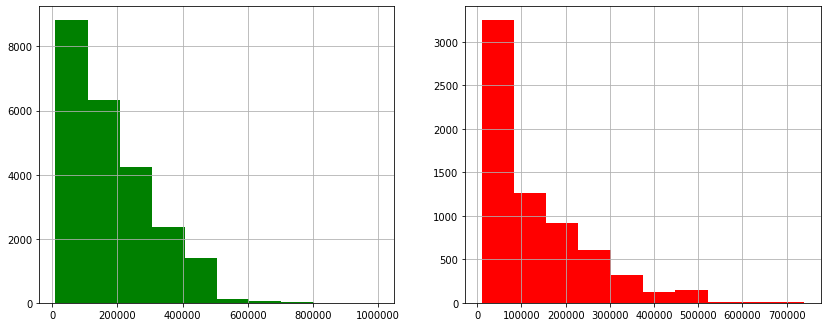

In [13]:
plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
back.hist(color='g')

plt.subplot(2,2,2)
not_back.hist(color='r');

 Проверим гипотезы с помощью статистики:
   * Н0: распределения равны
   * Н1: распределения не равны
   
для анализа воспользуемся непараметрическим **критерием Манна-Уитни**

In [14]:
scipy.stats.mannwhitneyu(back, not_back)

MannwhitneyuResult(statistic=59257217.5, pvalue=6.127742909111652e-190)

При сравнении значения достигаемого уровня значимости = 6.127742909111652e-190 с порогом альфа в 0.05, 

отвергаем нулевую гипотезу, следовательно, **распределния не равны**

Медиана кредитного лимита для тех кто вернул деньги больше, чем те, кто не вернул. Вероятно, система скоринга работает хорошо.

### 2

**Пол (SEX): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)**

In [15]:
data['SEX'] = data['SEX'].apply(lambda sex: 0 if sex==2 else 1) 
# 0-женщины, 1-мужчины

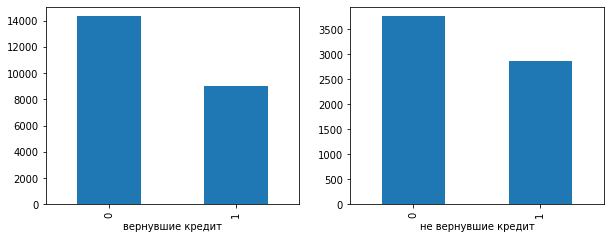

In [16]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
data[data['default']==0]['SEX'].value_counts().plot(kind='bar')
pylab.xlabel('вернувшиe кредит')

plt.subplot(2,2,2)
data[data['default']==1]['SEX'].value_counts().plot(kind='bar')
pylab.xlabel('не вернувшиe кредит');

In [17]:
data[data['default']==0]['SEX'].value_counts()

0    14349
1     9015
Name: SEX, dtype: int64

In [18]:
data[data['default']==1]['SEX'].value_counts()

0    3763
1    2873
Name: SEX, dtype: int64

Проверим гипотезы с помощью статистики:

* H0: гендерный состав групп не отличаются 

* H1: составы отличаются

воспользуемся z-критерием для разности долей

In [19]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [20]:
print("confidence interval: [%f, %f]" % proportions_confint_diff_ind(data[data['default']==0]['SEX'].values,
                                                                     data[data['default']==1]['SEX'].values))

confidence interval: [-0.060548, -0.033635]


In [21]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))


In [22]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)


In [23]:
print("p-value: %s" % proportions_diff_z_test(proportions_diff_z_stat_ind(data[data['default']==0]['SEX'].values,
                                                                     data[data['default']==1]['SEX'].values)))

p-value: 4.472866521609831e-12


Т.к p_value<0.05 **нулевая гипотеза отвергается**, след-но, составы отличаются

### 3

Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. 

Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?

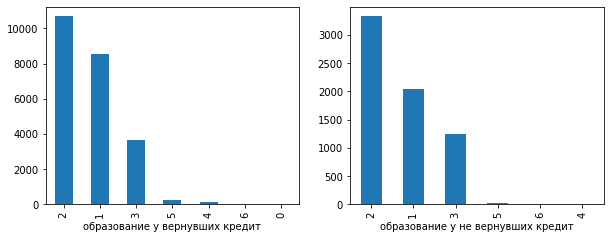

In [24]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
data[data['default']==0]['EDUCATION'].value_counts().plot(kind='bar')
pylab.xlabel('образование у вернувших кредит')

plt.subplot(2,2,2)
data[data['default']==1]['EDUCATION'].value_counts().plot(kind='bar')
pylab.xlabel('образование у не вернувших кредит');

наблюдаемые частоты

In [25]:
observed_frequences_back = np.bincount(data[data['default']==0]['EDUCATION'])
observed_frequences_back

array([   14,  8549, 10700,  3680,   116,   262,    43])

In [26]:
observed_frequences_not = np.bincount(data[data['default']==1]['EDUCATION'])
observed_frequences_not

array([   0, 2036, 3330, 1237,    7,   18,    8])

таблица сопряженности частот и образования

In [27]:
df = pd.DataFrame(index=['доктор', 'магистр', 'бакалавр', 'выпускник школы',
                         'начальное образование', 'прочее', 'нет данных'])
#'education'- в роле индекса
df['observed_frequences_back'] = observed_frequences_back
df['observed_frequences_not'] = observed_frequences_not
df

,observed_frequences_back,observed_frequences_not
доктор,14,0
магистр,8549,2036
бакалавр,10700,3330
выпускник школы,3680,1237
начальное образование,116,7
прочее,262,18
нет данных,43,8


In [28]:
df.corr()

,observed_frequences_back,observed_frequences_not
observed_frequences_back,1.000000,0.986666
observed_frequences_not,0.986666,1.000000


Проверим гипотезу о влиянии с помощью X^2 статистики:

* H0: образование не влияет

* H1: влияет

Для посчета достигаемого уровеня значимости воспользуемся chi2_contingency

In [29]:
chi2, p, dof, ex = scipy.stats.chi2_contingency(df)
p

1.2332626245415605e-32

**Отвергаем нулевую гипотезу** на уровене значимости 0.05 при p_value 1.2332626245415605e-32


добавляем ожидаемые частоты

In [30]:
expected_frequences_back = []
expected_frequences_not = []
for i in range(0,7):
    expected_frequences_back.append(int(ex[i][0]))
    expected_frequences_not.append(int(ex[i][1]))

In [31]:
expected_frequences_not

[3, 2341, 3103, 1087, 27, 61, 11]

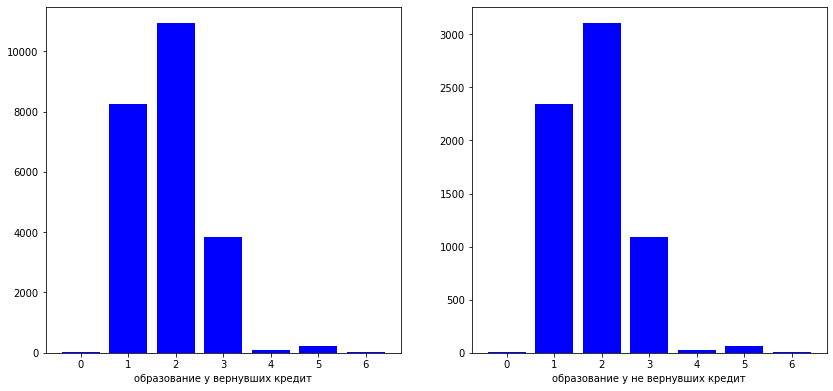

In [32]:
# графики для ожидаемых частот 
plt.figure(figsize=(14,14))
plt.subplot(2,2,1)
pylab.bar(range(len(expected_frequences_back)), expected_frequences_back, color = 'b')
pylab.xlabel('образование у вернувших кредит')

plt.subplot(2,2,2)
pylab.bar(range(len(expected_frequences_not)), expected_frequences_not, color = 'b')
pylab.xlabel('образование у не вернувших кредит');

In [33]:
between_frequences_back = np.round(observed_frequences_back - expected_frequences_back).astype(int)
between_frequences_not = np.round(observed_frequences_not - expected_frequences_not).astype(int)

Таблица сопряженности "образование" на "возврат долга", где значением ячейки  разность между наблюдаемым и ожидаемым количеством человек

In [34]:
df2 = pd.DataFrame(index=['доктор', 'магистр', 'бакалавр', 'выпускник школы',
                         'начальное образование', 'прочее', 'нет данных'])
df2['between_frequences_back'] = between_frequences_back
df2['between_frequences_not'] = between_frequences_not
df2

,between_frequences_back,between_frequences_not
доктор,4,-3
магистр,306,-305
бакалавр,-226,227
выпускник школы,-149,150
начальное образование,21,-20
прочее,44,-43
нет данных,4,-3


Лучше всего возвращают кредиты группы людей с индикаторами 2 и 3, хуже - 4 и 5 

### 4

Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

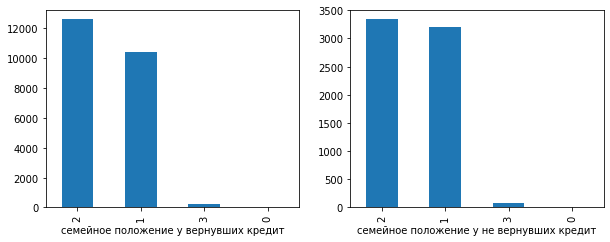

In [35]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
data[data['default']==0]['MARRIAGE'].value_counts().plot(kind='bar',)
pylab.xlabel('семейное положение у вернувших кредит')

plt.subplot(2,2,2)
data[data['default']==1]['MARRIAGE'].value_counts().plot(kind='bar')
pylab.xlabel('семейное положение у не вернувших кредит');

In [36]:
data_marriage = pd.DataFrame()
data_marriage['marr_back'] = np.bincount(data[data['default']==0]['MARRIAGE'])
data_marriage['marr_not'] = np.bincount(data[data['default']==1]['MARRIAGE'])
data_marriage

,marr_back,marr_not
0,49,5
1,10453,3206
2,12623,3341
3,239,84


С помощью статистики Х^2 проверим справедливость гипотез:
   * H0: семейный статус не влияет на возврат 

   * H1: семейный статус влияет

In [37]:
x_2, p_value = stats.chi2_contingency(data_marriage)[:2]
p_value

8.825862457577375e-08

p_value = 8.825862457577375e-08, нулевую гипотезу можно отвергнуть


посчитаем коэффициент взаимосвязи V-Крамера

In [38]:
np.sqrt(x_2/(sum(sum(data_marriage))*2))

0.024379771613073028

**0.02438 - корреляция слабая**

### 5

Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: 


**a**) о равенстве медианных значений возрастов людей 



In [39]:
age_back = data[data['default']==0]['AGE']
age_not_back = data[data['default']==1]['AGE']

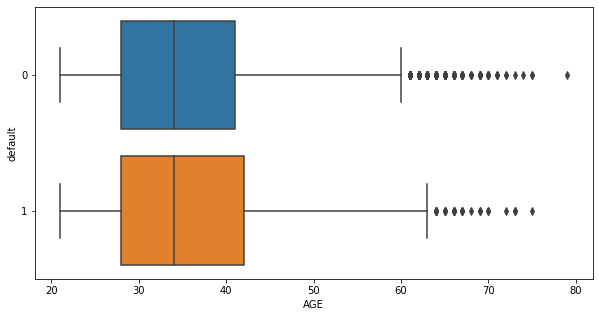

In [40]:
plt.figure(figsize=(10, 5))
sns.boxplot(data['AGE'], data['default'], orient='h');

Зрительно видно, что медианы равны. Проверим гипотезы с помощью статистики:
   * Н0: медианы равны
   * Н1: медианы не равны

In [41]:
np.random.seed(0)

age_back_median = list(map(np.median, get_bootstrap_samples(age_back.values, 1000)))
age_not_back_median = list(map(np.median, get_bootstrap_samples(age_not_back.values, 1000)))

print("95% confidence interval for returned:",  stat_intervals(age_back_median, 0.05))
print("95% confidence interval for didn't return:",  stat_intervals(age_not_back_median, 0.05))

95% confidence interval for returned: [34. 34.]
95% confidence interval for didn't return: [34. 35.]


Интервальная оценка медианных значений кредитного лимита **не дает отвергнуть нулевую гипотезу** 

In [42]:
delta_median_age = list(map(lambda x: x[1] - x[0], zip(age_back_median, age_not_back_median)))

In [43]:
print("95% confidence interval for the difference between medians",  stat_intervals(delta_median_age, 0.05))

95% confidence interval for the difference between medians [0. 1.]


Интервальная оценка разности медиан также подтверждает, Н0 отвергнуть нельзя

b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

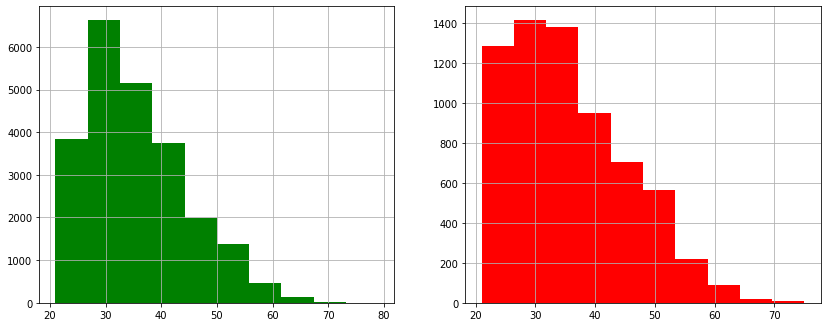

In [44]:
plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
age_back.hist(color='g')

plt.subplot(2,2,2)
age_not_back.hist(color='r');

Проверим гипотезы с помощью статистики:

* Н0: распределения равны

* Н1: распределения не равны

для анализа воспользуемся непараметрическим критерием Манна-Уитни

In [45]:
scipy.stats.mannwhitneyu(age_back, age_not_back)

MannwhitneyuResult(statistic=76966879.5, pvalue=0.1862517717449308)

p_value=0.186 > 0.05 => **отвергнуть нулевую гипотезу нельзя**